/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Text(0, 0.5, 'Inertia')

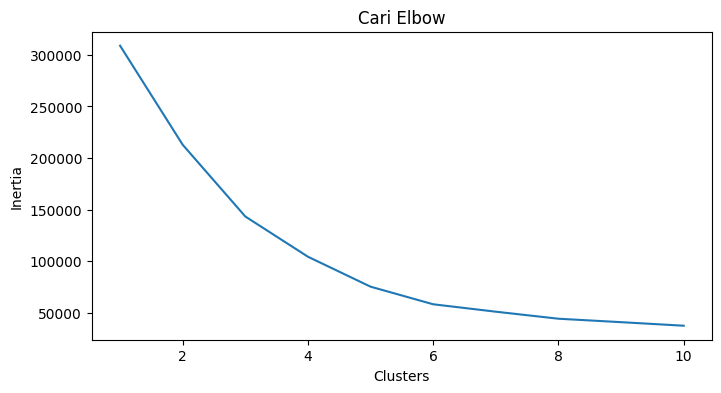

In [20]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Read the CSV file
df = pd.read_csv('Mall_Customers.csv')

#Rename the column
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

#Convert into numeric
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

#Drop the CustomerId and Gender (not relevant for the clustering)
x = df.drop(['CustomerID', 'gender'], axis=1)

#Inertia list
clusters = []

for i in range (1, 11) :
  km = KMeans(n_clusters=i).fit(x)
  clusters.append(km.inertia_)

#Plot inertia (Elbow method)

fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


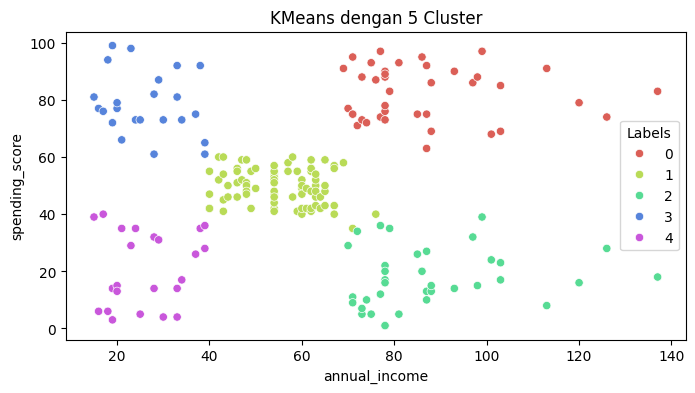

In [22]:
#Kmeans Object
km5 = KMeans(n_clusters=5).fit(x)

#Label the dataset
x['Labels'] = km5.labels_

#Plot the KMeans withj 5 cluster

plt.figure(figsize=(8,4))
sns.scatterplot(x=x['annual_income'], y=x['spending_score'], hue=x['Labels'], # Changed 'X' to 'x'
                palette=sns.color_palette('hls', 5))

plt.title('KMeans dengan 5 Cluster')
plt.show()